In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("Customer_data - customer_data.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [7]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [11]:
#data preprocessing
#to check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

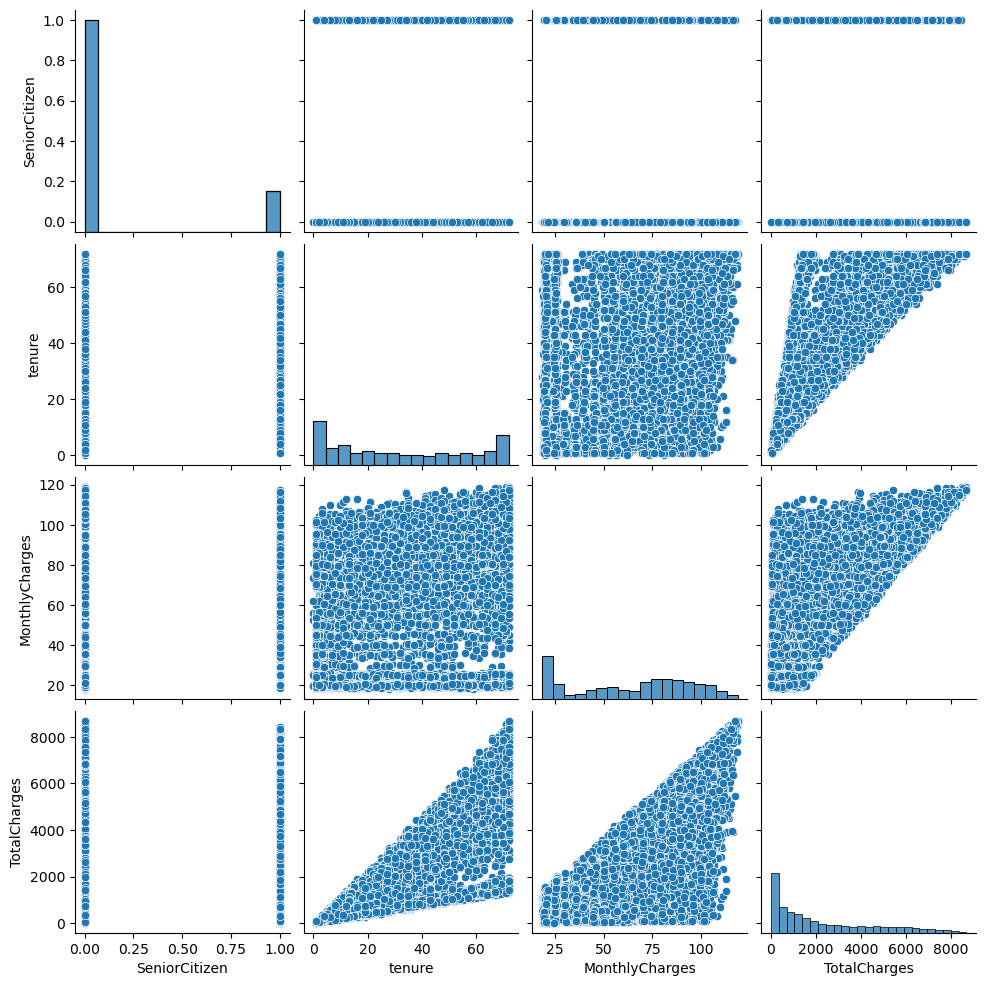

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [17]:
num_col=df.select_dtypes(include=["number"]).columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [19]:
df[num_col] = df[num_col].fillna(df[num_col].median())
df[num_col]

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]

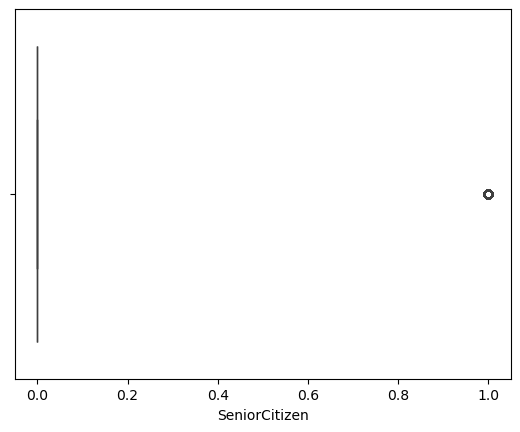

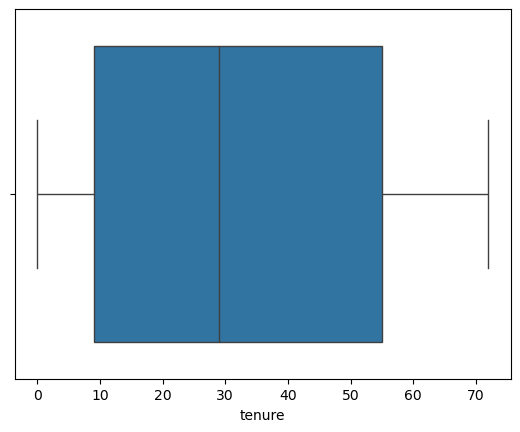

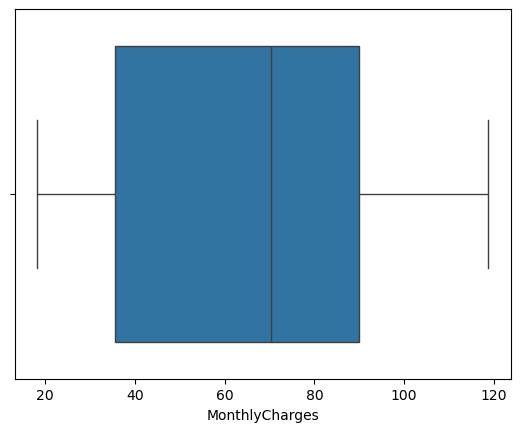

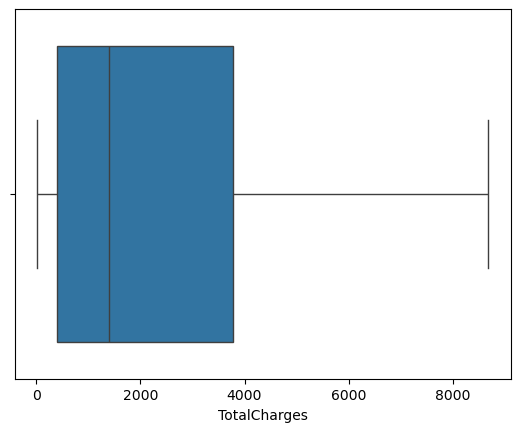

In [21]:
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

In [23]:
cat_col = df.select_dtypes(include=["object"]).columns
cat_col

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat_col:
    df[col]=encoder.fit_transform(df[col])

In [27]:
Q1 = df[num_col].quantile(0.15)
Q3 = df[num_col].quantile(0.85)
IQR = Q3 - Q1
filtered_data = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(filtered_data)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

In [29]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


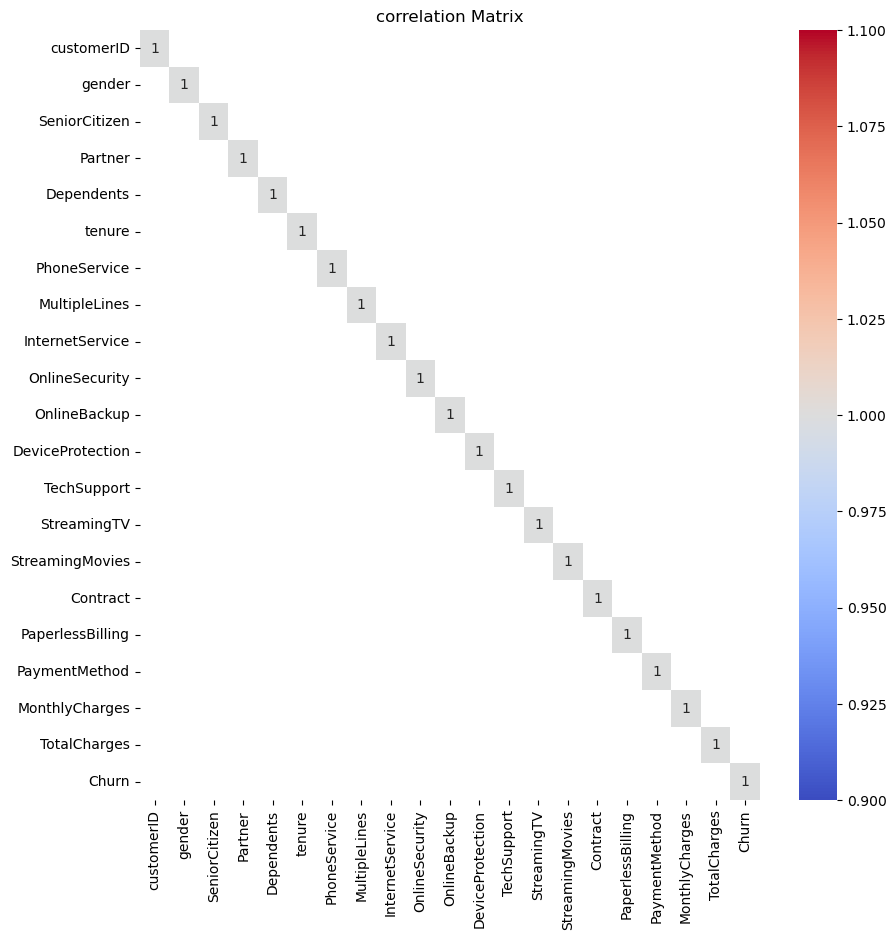

In [39]:
#data modelling
#correlation matrix
correlation_matrix=filtered_data.corr()
high_correlation = correlation_matrix[(correlation_matrix > 0.85) | (correlation_matrix < -0.85)]  # Only strong correlations

plt.figure(figsize=(10,10))
sns.heatmap(high_correlation,annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

In [49]:
#regression model
x=filtered_data.drop(["Churn","customerID"], axis=1)
y=filtered_data["Churn"]
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 19)
(1761, 19)
(5282,)
(1761,)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)  
X_test = scaler.transform(x_test)

In [55]:
from sklearn.linear_model import LinearRegression
simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=simple_model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'R^2 Score: {r2_score(y_test,y_pred)}')


Mean Squared Error: 0.1379168342523558
R^2 Score: 0.3035139005899904


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression(solver='newton-cg')
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
log_reg_accuracy=accuracy_score(y_test,log_reg_pred)

In [79]:
#model evaluation
from sklearn.metrics import classification_report
print(f'Logistic Regression Accuracy" {log_reg_accuracy*100:.2f}')
print('\nLogistic Regression Classification report:')
print(classification_report(y_test,log_reg_pred))


Logistic Regression Accuracy" 81.03

Logistic Regression Classification report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1282
           1       0.68      0.56      0.62       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.75      1761
weighted avg       0.80      0.81      0.80      1761



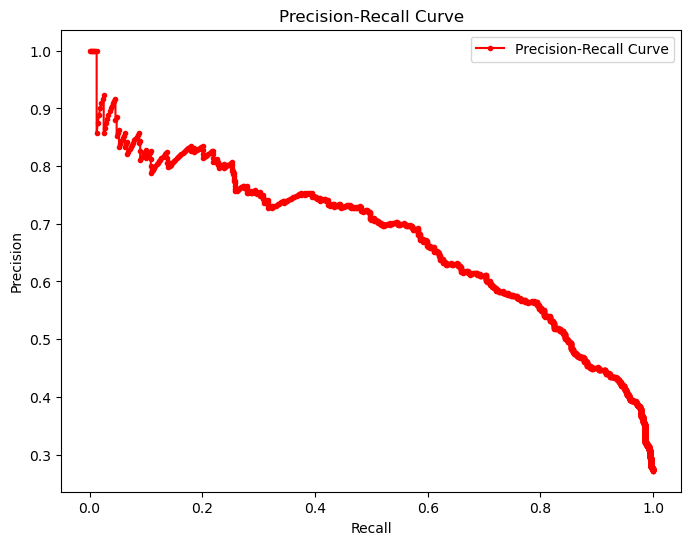

In [83]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='red', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

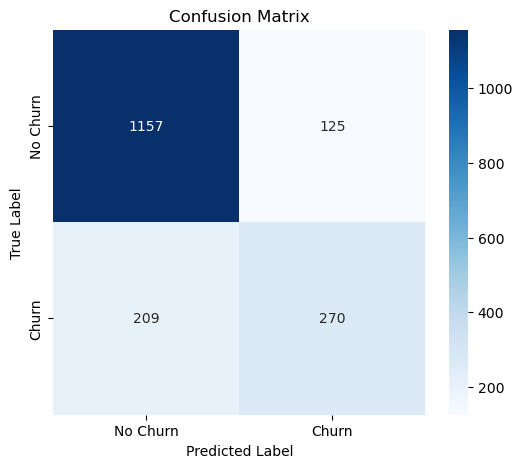

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, log_reg_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Conclusion:
1. In linear regression model, the MSE is low so it is not performing well in the given scenario. Also, the value of R^2 is low means that 70% of the variation in price is not captured by the model.
2. For the Logistic regression:
    1.  The model correctly predicts 81.03% of the cases, which indicates a good but not perfect performance.
    2.  The model performs better on class 0 because it has more examples to learn from.
    3.  Class 0 Recall (90%) → The model correctly identifies 90% of actual 0s.
        Class 1 Recall (56%) → The model only captures 56% of actual 1s.
    4. Class 0: 0.87 (Good balance, better than class 1).
    5. Macro Avg F1-Score: 0.75 → This means that the model has moderate balance across both classes.
3. Confuation matrix:
       1. The model performs well in predicting "No Churn" but struggles more with correctly predicting "Churn" cases.
       2. True Negatives (1157): The model correctly classified 1,157 customers as not churning. This is a good sign since most users stay.
       3. True Positives (270): The model correctly identified 270 customers who actually churned, but this number could be improved.
       4. False Positives (125): There are 125 cases where the model predicted churn, but they didn’t churn. This may lead to unnecessary retention efforts.
       5. False Negatives (209): 209 actual churners were misclassified as non-churners. This is concerning because failing to detect churn can result in business losses.
   

Video link: 
https://drive.google.com/file/d/12q6dk0kQSBtqrH3c7SqLgMNVmxd6FhTI/view?usp=drive_link
